# <center>BAYESIAN INFERENCE</center>
Nhắc lại *frequentist inference*, thì mean hoặc proportion của sample sẽ tuân theo central limit theorem, tức là khoảng tin cậy 95% nằm trong 1.96 SD.  
Còn *bayesian inference*, chúng ta phải có prior. Từ prior và likelihood của sample, ta sẽ tính được posterior distribution.  
Từ đó, ta có:
- Credible interval 95%
- HPD: Highest posterior density: tức là credible interval 95% nhưng hẹp nhất

*Để biết PDF của các loại phân phối, xin xem lại các bài trước*  

---

# Ví dụ: Kiểm tra p(head) của 1 đồng xu. 

### Chọn Prior
Ta không biết đồng xu có fake hay không? Prior $\sim U(0,1)$  
Prior PDF = Uniform(0, 1)= $I_{\{0 \leq p \leq 1\}}$  

### Thu thập data
Ta thu thập data từ đồng xu này  
Likelihood = bernoulli = $ p^k(1-p)^{n-k} $  
Giả sử **data = [1]**

### 1. Frequentist inference:  
Tính MLE của likelihood, ta dự đoán $p_{\text{đồng xu}} = p_{\text{mẫu}} \pm 1.96\sqrt{\frac{p(1-p)}{n}} $

Với **data = [1]** thì khoảng tin cậy 95% = $ 1 + 1.96\sqrt{\frac{1(1-1)}{1}} = 1 \pm 0$

**Rõ ràng** thì với frequentist approach thì con số 1 không có ý nghĩa nhiều để suy diễn p(head) của đồng xu.  
**Hãy** xem cách tính CI 95% theo Bayesian approach.

### 2. Bayesian inference:  
- Theo bayes theorem for continuous variable  
$ \text{posterior} = \frac{\text{likelihood}\;\times\;\text{prior}} {\text{normalizing constant    }  } $  
- Áp công thức prior và likelihood vào, tao có công thức posterior:  
$ f(p|y) = \frac{f(y|p)f(p)}{f(y)}
=\frac{p^k(1-p)^{n-k} I_{\{0 \leq p \leq 1\}}}{\int_{-\infty}^\infty p^k(1-p)^{n-k} I_{\{0 \leq p \leq 1\}}dp} $

- Với **data = [1]**, tức là n=1, k=1, thì ta có posterior:  
$ f(p|y) = \frac{p^1(1-p)^{1-1} I_{\{0 \leq p \leq 1\}}}{\int_{-\infty}^\infty p^1(1-p)^{1-1} I_{\{0 \leq p \leq 1\}}dp} = \frac{p I_{\{0 \leq p \leq 1\}}}{\int_0^1 p dp}  = 2p I_{\{0 \leq p \leq 1\}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

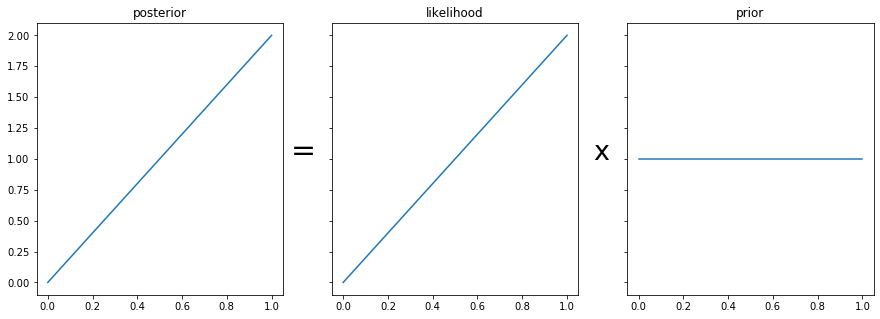

In [2]:
prior = st.uniform(0,1)

arr = np.linspace(0,1,100)

fig, ax = plt.subplots(1,3, figsize=(15,5), sharey='all')

ax[0].plot(arr, arr*2)
ax[0].set_title("posterior");

ax[1].plot(arr, st.bernoulli.pmf(1,p=arr)*2)
ax[1].set_title("likelihood")

ax[2].plot(arr, prior.pdf(arr))
ax[2].set_title("prior");

fig.text(0.36,0.5,"=", size=30)
fig.text(0.64,0.5,"x", size=27);

### Credible interval 95% là khoảng chứa 95% density của posterior
Từ ví dụ trên, ta có:  
- $ P(p<x) = \int_0^x 2pI_{\{0 \leq p \leq 1\}} = x^2$  
$ P(\sqrt{0.025}< p<\sqrt{0.975}) = 0.95 $  
=> Credible Interval 95% = (0.158, 0.987)  

In [3]:
# ở đây tôi dùng beta(2,1) để mô phỏng f(p|y) = 2pI, với I=1 trong khoảng (0,1)
st.beta(2,1).interval(0.95)

(0.15811388300841903, 0.9874208829065749)

### Tìm HPD là CI 95% ngắn nhất:
Với f(p|y) = 2p, ta xem đồ thị thì nhạn thấy HPD nằm ở bên phải của phân phối.

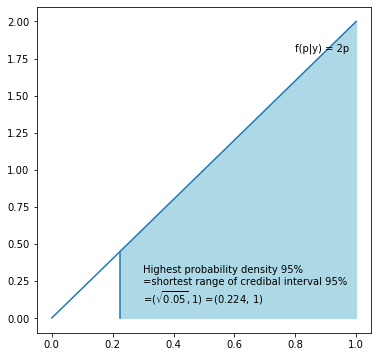

In [12]:
# vẽ đồ thị của posterior distribution với data = [1]
arr = np.linspace(0,1,20)
plt.figure(figsize=(6,6))
plt.plot(arr, 2*arr)
plt.text(0.8, 1.8, "f(p|y) = 2p")

# HPD 95% là khoảng ngắn nhất chứa 95% density, 
# nhìn hình ta thấy đây là khoảng từ sqrt(0.05) đó đến 1.
plt.axvline(np.sqrt(0.05), 0.045 ,0.245)
arr2 = np.linspace(np.sqrt(0.05), 1, 18)
plt.fill_between(arr2, 2*arr2, color="lightblue")
plt.text(0.3, 0.1,
         "Highest probability density 95%\n"
         "=shortest range of credibal interval 95%\n"
         "=$(\sqrt{0.05}, 1)$ =(0.224, 1)");

**Trong thực tế, việc tính ra posterior trực tiếp thường không được vì tính mẫu số của bayes theorem khó khăn, tuy nhiên ta có thể tìm đồng dạng của nó bằng cách dùng conjugate prior.**  
$$ \text{Posterior} \propto (\text{Likelihood} \times \text{Prior}) $$  

Dấu $\propto$ nghĩa là **đồng dạng với**.

Sau khi có phân phối posterior đồng dạng thì việc tìm normalizing constant dễ dàng thông qua các dạng distribution tổng quát như gamma, beta, normal,.. hoặc có thể ước lượng bằng cách lấy mẫu thử từ posterior.